### notes:
- plot_SSUSI seems generally useful for hemispheric plots
- however, you have to manually search for the file path. thats probably not ideal. can we automate this?
- what is line 30-31 chen's code used for?

In [2]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset

import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_SSUSI(image,mlat,mlt,maxi,mini,time_stamp,name, cmap_str):

    fig=plt.figure()
    plt.subplots_adjust(left = 0.15,
            right=0.85,
            wspace = 0.03,hspace = 0.03)
    ax = fig.add_subplot(1,1,1,polar=True)

    #plot polar map
    theta = mlt*15.0*np.pi/180.0-np.pi/2
    rad = 90.0-mlat

    hs=ax.scatter(theta,rad,c=image,
            s=0.5,vmin=mini,vmax=maxi,
            cmap=cmap_str,alpha=0.6)
    levels = [0.0,10,20,30,40]
    ax.set_rticks(levels)
    ax.set_rmax(40.0)
    ax.set_yticklabels(['','','','','50'])
    ax.set_rlabel_position(22.5)
    ax.set_xticks(np.arange(0,2*np.pi,np.pi/2.0))
    ax.set_xticklabels(['06','12', '18', '00'])
    ax.grid(True)
    ax.set_title(name + "\n" + str(time_stamp))

    fig.colorbar(hs,ax=ax,shrink=0.7)

    return

In [11]:
# inputs
# =======
sat_name = 'f17'
date_str = '20100405'  # date in yyyymmdd format

# extract info
year = date_str[0:4]   # year
# get date of year
date_fmt = '%Y%m%d'
datetime_Ymd = dt.datetime.strptime(date_str, date_fmt)
datetime_doy = datetime_Ymd.timetuple().tm_yday
doy = f'{datetime_doy:03d}'

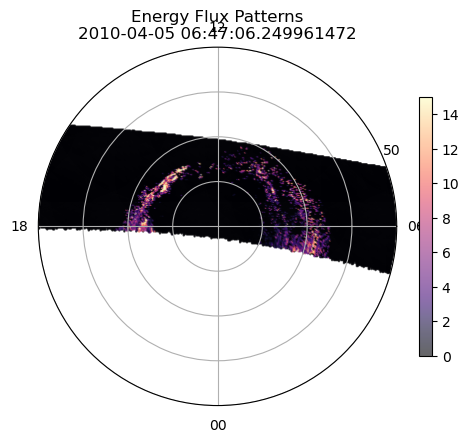

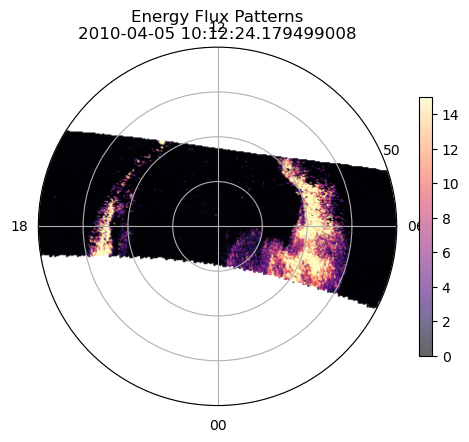

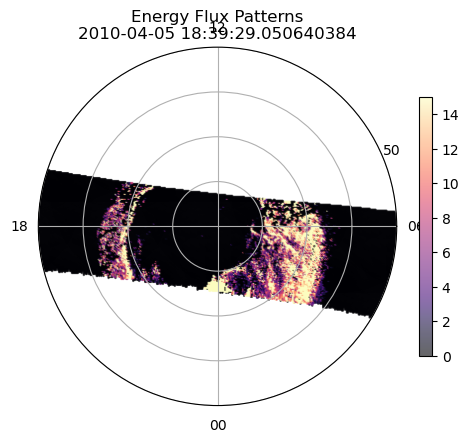

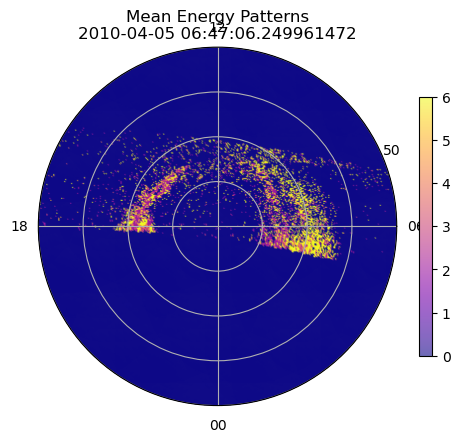

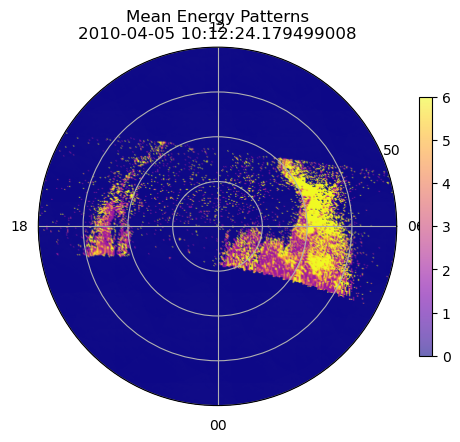

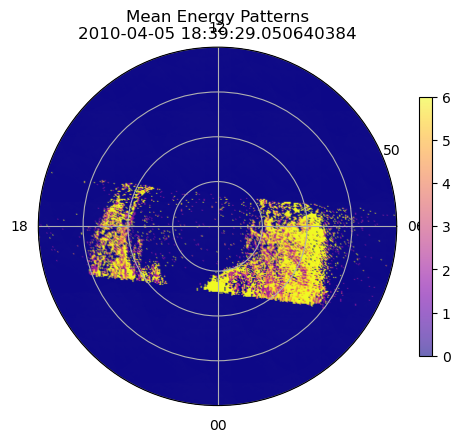

In [6]:
# main
# =====
# energy flux
for ind in [24,26,31]:
    ind = str(ind)
    SSUSI_PATH = f'/backup/Data/ssusi/data/ssusi.jhuapl.edu/dataN/{sat_name}/apl/edr-aur/{year}/{doy}/'
    SSUSI_PATH = SSUSI_PATH + 'PS.APL_V0105S027CE0008_SC.U_DI.A_GP.F17-SSUSI_PA.APL-EDR-AURORA_DD.20100405_SN.176' + ind + '-00_DF.NC'
    ssusi=Dataset(SSUSI_PATH)
    
    nodatavalue = ssusi.NO_DATA_IN_BIN_VALUE  # value in a no data bin
    ut = ssusi['UT_N'][:]
    vartmp = np.array(ssusi['DISK_RADIANCEDATA_INTENSITY_NORTH'])
    
    # get energy flux map
    image = vartmp[4,:,:]
    energyflux_n = np.array(ssusi['ENERGY_FLUX_NORTH_MAP'])
    fp = (ut == nodatavalue)
    energyflux_n[fp] = np.nan
    image[fp] = np.nan

    # get timestamp
    starttime = ssusi.STARTING_TIME
    stoptime = ssusi.STOPPING_TIME
    yyyy = int(stoptime[:4])
    ddd = int(stoptime[4:7])
    date = pd.Timestamp(yyyy, 1, 1)+pd.Timedelta(ddd-1, 'D')
    timestamp = date+pd.Timedelta(np.nanmean(ut[image==image]),'h')

    if starttime[:7] != stoptime[:7]:
        ut[ut > 20] = ut[ut > 20]-24 # MXB Q: what does this do?

    # set up plot
    dataplot = energyflux_n
    mlat = np.array(ssusi['LATITUDE_GEOMAGNETIC_GRID_MAP']) 
    mlt = np.array(ssusi['MLT_GRID_MAP'])

    maxi = 15 # MXB Q: what does this mean
    mini = 0  # MXB Note: I used Mukhopadhyay et al 2022 Fig 8a max/mins for this
    
    name = "Energy Flux Patterns"
    cmap_str = "magma"
    plot_SSUSI(dataplot,mlat,mlt,maxi,mini,timestamp,name, cmap_str)
    
    plt.show()

# mean energy
for ind in [24,26,31]:
    ind = str(ind)
    SSUSI_PATH = f'/backup/Data/ssusi/data/ssusi.jhuapl.edu/dataN/{sat_name}/apl/edr-aur/{year}/{doy}/'
    SSUSI_PATH = SSUSI_PATH + 'PS.APL_V0105S027CE0008_SC.U_DI.A_GP.F17-SSUSI_PA.APL-EDR-AURORA_DD.20100405_SN.176' + ind + '-00_DF.NC'
    ssusi=Dataset(SSUSI_PATH)
    
    nodatavalue = ssusi.NO_DATA_IN_BIN_VALUE  # value in a no data bin
    ut = ssusi['UT_N'][:]
    vartmp = np.array(ssusi['DISK_RADIANCEDATA_INTENSITY_NORTH'])
    
    # get energy flux map
    image = vartmp[4,:,:]
    meanenergy_n = np.array(ssusi['ELECTRON_MEAN_NORTH_ENERGY_MAP'])
    fp = (ut == nodatavalue)
    energyflux_n[fp] = np.nan
    image[fp] = np.nan

    # get timestamp
    starttime = ssusi.STARTING_TIME
    stoptime = ssusi.STOPPING_TIME
    yyyy = int(stoptime[:4])
    ddd = int(stoptime[4:7])
    date = pd.Timestamp(yyyy, 1, 1)+pd.Timedelta(ddd-1, 'D')
    timestamp = date+pd.Timedelta(np.nanmean(ut[image==image]),'h')

    # set up plot
    dataplot = meanenergy_n
    mlat = np.array(ssusi['LATITUDE_GEOMAGNETIC_GRID_MAP']) 
    mlt = np.array(ssusi['MLT_GRID_MAP'])

    maxi = 6 # MXB Q: same what does this mean
    mini = 0 # MXB Note: I used Mukhopadhyay et al 2022 Fig 8b max/mins for this
    
    name = "Mean Energy Patterns"
    cmap_str = "plasma"
    plot_SSUSI(dataplot,mlat,mlt,maxi,mini,timestamp,name, cmap_str)
    
    plt.show()